# Temperatura
Dada uma série de temperaturas mensais pretende-se determinar qual o trimestre em que ocorreu a temperatura mais elevada.

- O primeiro valor da série corresponde ao mês de janeiro de 2018, o segundo valor da série ao mês de fevereiro de 2018 e assim sucessivamente.
- Se existirem vários valores máximos deve ser apresentado o trimestre em que ocorreu pela primeira vez essa temperatura.
- Calcule a série de temperaturas médias mensais e identifique o trimestre com a temperatura média mais elevada.

Por exemplo, dada a seguinte série de temperaturas:

14 16 19 24 26 22 20 18 15 14 12 12 13 17 22 26 25 24 24 18 18 15 14 12

Apresente a visualização dos trimestres, identificando o trimestre máximo.

In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
nl_temperaturas = "14 16 19 24 26 22 20 18 15 14 12 12 13 17 22 26 25 24 24 18 18 15 14 12"

temperaturas = nl_temperaturas.split(" ")

temperaturas, len(temperaturas)

(['14',
  '16',
  '19',
  '24',
  '26',
  '22',
  '20',
  '18',
  '15',
  '14',
  '12',
  '12',
  '13',
  '17',
  '22',
  '26',
  '25',
  '24',
  '24',
  '18',
  '18',
  '15',
  '14',
  '12'],
 24)

In [3]:
# associando cada temperatura a um mês e ano. início em Janeiro de 2018
from datetime import datetime
for i in range(len(temperaturas)):
    if i < 12:
        temperaturas[i] = [int(temperaturas[i]), f"{i+1:02d}-2018"]
    else:
        temperaturas[i] = [int(temperaturas[i]), f"{i-11:02d}-2019"]
    
temperaturas

[[14, '01-2018'],
 [16, '02-2018'],
 [19, '03-2018'],
 [24, '04-2018'],
 [26, '05-2018'],
 [22, '06-2018'],
 [20, '07-2018'],
 [18, '08-2018'],
 [15, '09-2018'],
 [14, '10-2018'],
 [12, '11-2018'],
 [12, '12-2018'],
 [13, '01-2019'],
 [17, '02-2019'],
 [22, '03-2019'],
 [26, '04-2019'],
 [25, '05-2019'],
 [24, '06-2019'],
 [24, '07-2019'],
 [18, '08-2019'],
 [18, '09-2019'],
 [15, '10-2019'],
 [14, '11-2019'],
 [12, '12-2019']]

In [4]:
# convertendo datas para datetime para obter abreviação dos meses como Janeiro 2018, Fevereiro 2018, etc
for i in range(len(temperaturas)):
    temperaturas[i][1] = datetime.strptime(temperaturas[i][1], "%m-%Y")
    
temperaturas

[[14, datetime.datetime(2018, 1, 1, 0, 0)],
 [16, datetime.datetime(2018, 2, 1, 0, 0)],
 [19, datetime.datetime(2018, 3, 1, 0, 0)],
 [24, datetime.datetime(2018, 4, 1, 0, 0)],
 [26, datetime.datetime(2018, 5, 1, 0, 0)],
 [22, datetime.datetime(2018, 6, 1, 0, 0)],
 [20, datetime.datetime(2018, 7, 1, 0, 0)],
 [18, datetime.datetime(2018, 8, 1, 0, 0)],
 [15, datetime.datetime(2018, 9, 1, 0, 0)],
 [14, datetime.datetime(2018, 10, 1, 0, 0)],
 [12, datetime.datetime(2018, 11, 1, 0, 0)],
 [12, datetime.datetime(2018, 12, 1, 0, 0)],
 [13, datetime.datetime(2019, 1, 1, 0, 0)],
 [17, datetime.datetime(2019, 2, 1, 0, 0)],
 [22, datetime.datetime(2019, 3, 1, 0, 0)],
 [26, datetime.datetime(2019, 4, 1, 0, 0)],
 [25, datetime.datetime(2019, 5, 1, 0, 0)],
 [24, datetime.datetime(2019, 6, 1, 0, 0)],
 [24, datetime.datetime(2019, 7, 1, 0, 0)],
 [18, datetime.datetime(2019, 8, 1, 0, 0)],
 [18, datetime.datetime(2019, 9, 1, 0, 0)],
 [15, datetime.datetime(2019, 10, 1, 0, 0)],
 [14, datetime.datetime(2019

In [5]:
# média trimestral das temperaturas
media_trimestral = []
for i in range(0, len(temperaturas), 3):
    media_trimestral.append((temperaturas[i][1], round((temperaturas[i][0] + temperaturas[i+1][0] + temperaturas[i+2][0]) / 3, 2)))

media_trimestral

[(datetime.datetime(2018, 1, 1, 0, 0), 16.33),
 (datetime.datetime(2018, 4, 1, 0, 0), 24.0),
 (datetime.datetime(2018, 7, 1, 0, 0), 17.67),
 (datetime.datetime(2018, 10, 1, 0, 0), 12.67),
 (datetime.datetime(2019, 1, 1, 0, 0), 17.33),
 (datetime.datetime(2019, 4, 1, 0, 0), 25.0),
 (datetime.datetime(2019, 7, 1, 0, 0), 20.0),
 (datetime.datetime(2019, 10, 1, 0, 0), 13.67)]

In [41]:
# temperatura média mais elevada
maior_media = max(media_trimestral, key=lambda x: x[1])[1]
maior_media

25.0

Plotando a série de temperaturas mensais e identificar o trimestre com a temperatura máxima.

In [23]:
# após ser removido a temperatura média mais elevada
media_trimestral_mod = [x for x in media_trimestral if x[1] != maior_media]

# plot gráfico de barras com a temperatura média trimestral usando plotly sem a temperatura média mais elevada
plot_temperaturas = go.Figure(data=[go.Bar(x=[x[0] for x in media_trimestral_mod], y=[x[1] for x in media_trimestral_mod], name='blue')])

# colorindo a temperatura média mais elevada em vermelho
plot_temperaturas.add_trace(go.Bar(x=[max(media_trimestral, key=lambda x: x[1])[0]], y=[max(media_trimestral, key=lambda x: x[1])[1]], marker_color='red', name='red'))

# adicionado título centralizado e nome dos eixos
plot_temperaturas.update_layout(title="Temperatura Média Trimestral", xaxis_title="Data", yaxis_title="Temperatura (ºC)", legend_title_text="color")

go.FigureWidget(plot_temperaturas)

FigureWidget({
    'data': [{'name': 'blue',
              'type': 'bar',
              'uid': '915475d4-e52f-49b8-a323-b3b81913785a',
              'x': [2018-01-01 00:00:00, 2018-04-01 00:00:00, 2018-07-01 00:00:00,
                    2018-10-01 00:00:00, 2019-01-01 00:00:00, 2019-07-01 00:00:00,
                    2019-10-01 00:00:00],
              'y': [16.33, 24.0, 17.67, 12.67, 17.33, 20.0, 13.67]},
             {'marker': {'color': 'red'},
              'name': 'red',
              'type': 'bar',
              'uid': '7dce0348-ba97-4acb-bd3d-9d72809c462e',
              'x': [2019-04-01 00:00:00],
              'y': [25.0]}],
    'layout': {'legend': {'title': {'text': 'color'}},
               'template': '...',
               'title': {'text': 'Temperatura Média Trimestral'},
               'xaxis': {'title': {'text': 'Data'}},
               'yaxis': {'title': {'text': 'Temperatura (ºC)'}}}
})

Obtendo o mesmo gráfico anterior usando matplotlib

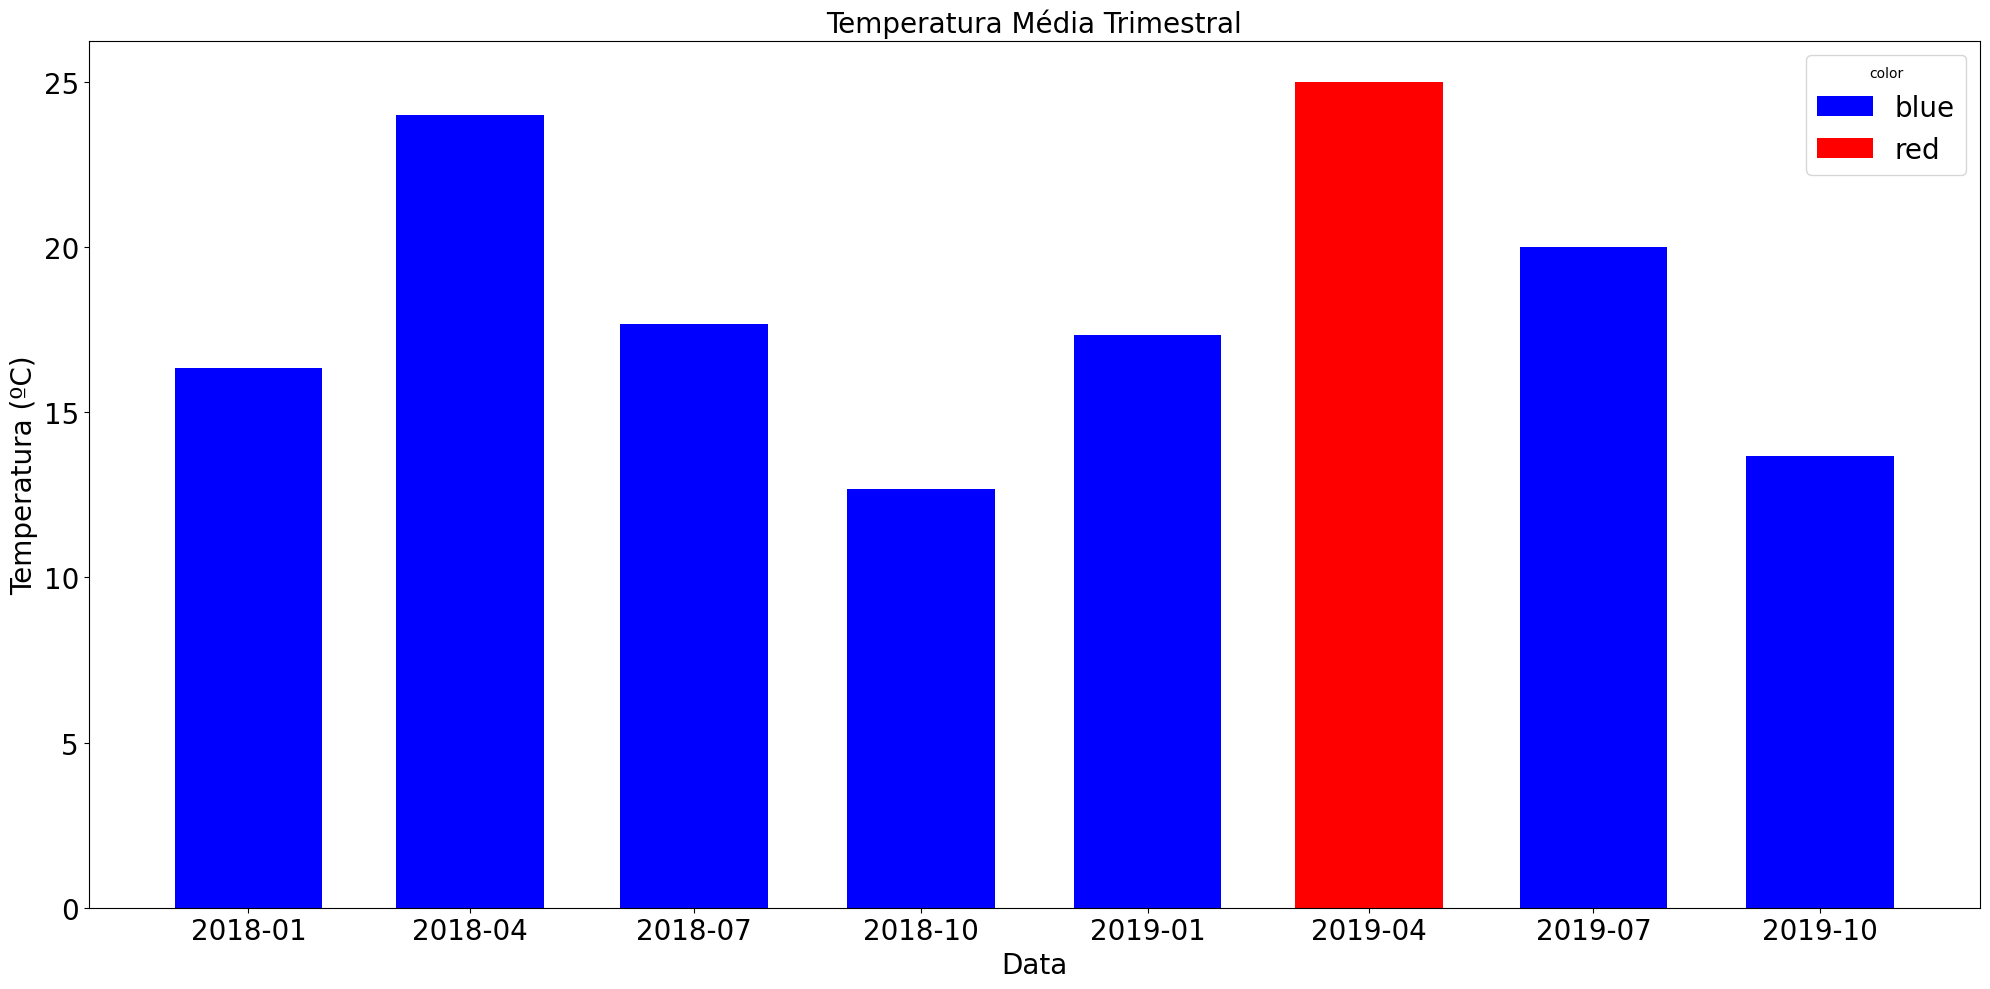

In [40]:
from matplotlib import pyplot as plt

# definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# plotando o gráfico de barras com a temperatura média trimestral usando matplotlib sem a temperatura média mais elevada
plt.bar([x[0] for x in media_trimestral_mod], [x[1] for x in media_trimestral_mod], width=60, color='blue')

# adicionando e colorindo a temperatura média mais elevada em vermelho
plt.bar([max(media_trimestral, key=lambda x: x[1])[0]], [max(media_trimestral, key=lambda x: x[1])[1]], width=60, color='red')

# definindo o tamanho da fonte do rótulo do eixo x e y para 20
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

# adicionado título, nome dos eixos e legenda
plt.title("Temperatura Média Trimestral", fontsize=20)
plt.xlabel("Data", fontsize=20)
plt.ylabel("Temperatura (ºC)", fontsize=20)
plt.legend(title="color", labels=["blue", "red"], fontsize=20)
plt.tight_layout()
plt.show()